In [1]:
#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv('train.csv')

dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [3]:
dataset
#causal and registered cols need to be removed
#to be predicted: count col

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
#describing the dataset
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
#checking for null values in dataset

count=dataset.isnull().sum()
print(count)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7CFBA02B0>,
      dtype=object)

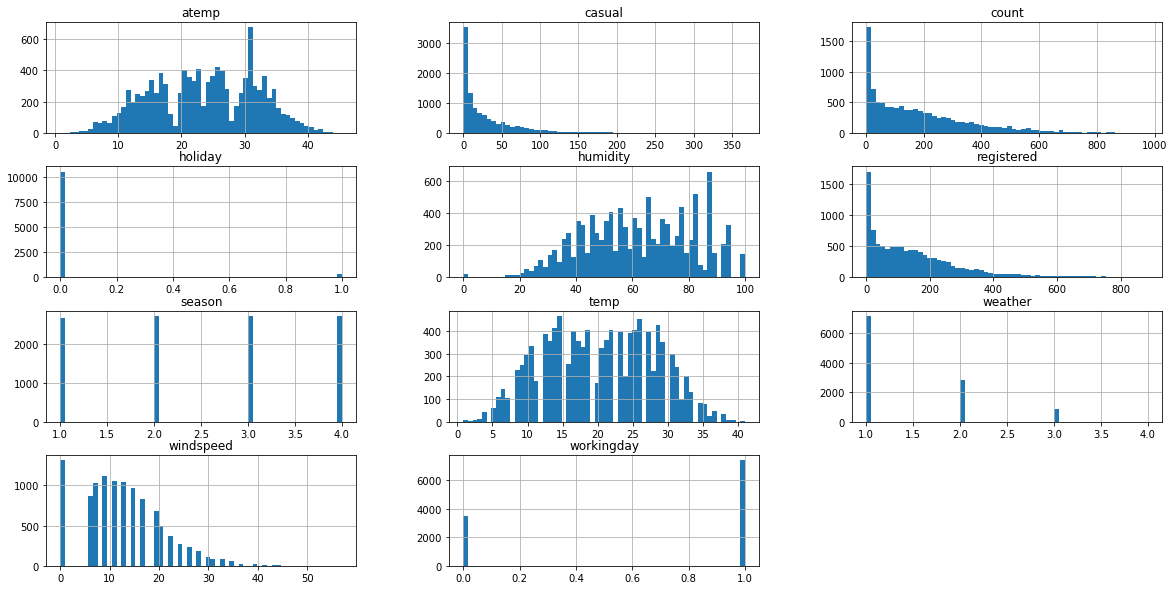

In [7]:
dataset.hist(bins=60,figsize=(20,10))

In [8]:
#selecting random rows from the dataset
dataset.sample(n=10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3435,2011-08-13 01:00:00,3,0,0,2,27.88,31.820,57,6.0032,13,64,77
4870,2011-11-16 00:00:00,4,0,1,2,18.86,22.725,94,0.0000,5,26,31
4107,2011-10-03 04:00:00,4,0,1,1,13.94,17.425,87,7.0015,2,6,8
9078,2012-09-01 15:00:00,3,0,0,2,35.26,39.395,44,19.0012,257,306,563
1117,2011-03-11 05:00:00,1,0,1,1,12.30,14.395,81,15.0013,1,6,7
5857,2012-01-19 06:00:00,1,0,1,1,4.92,6.820,54,11.0014,0,86,86
10058,2012-11-04 11:00:00,4,0,0,1,15.58,19.695,46,15.0013,134,311,445
3179,2011-08-02 09:00:00,3,0,1,1,31.98,34.850,46,19.9995,31,182,213
9974,2012-10-19 23:00:00,4,0,1,1,18.86,22.725,88,7.0015,13,118,131
159,2011-01-07 22:00:00,1,0,1,2,7.38,9.850,43,11.0014,2,34,36


In [9]:
#splitting the datetime column into separate columns
dataset['datetime'] = pd.to_datetime(dataset['datetime'], errors='coerce')


dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['hour'] = dataset['datetime'].dt.hour


In [10]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [51]:
#We will replace season,workingday and weather with appropriate categorical values
#this is done to perform the analysis

In [11]:
dataset['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace=True)
dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4
5,2011-01-01 05:00:00,spring,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,1,5
6,2011-01-01 06:00:00,spring,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,1,6
7,2011-01-01 07:00:00,spring,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,1,7
8,2011-01-01 08:00:00,spring,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,1,8
9,2011-01-01 09:00:00,spring,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,1,9


In [12]:
dataset['weather'].replace({1:"Clear",2:"Misty+cloudy",3:"Light Snow/Rain",4:'Heavy Snow/Rain'},inplace=True)
dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,1,1,4
5,2011-01-01 05:00:00,spring,0,0,Misty+cloudy,9.84,12.880,75,6.0032,0,1,1,1,1,5
6,2011-01-01 06:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,2,0,2,1,1,6
7,2011-01-01 07:00:00,spring,0,0,Clear,8.20,12.880,86,0.0000,1,2,3,1,1,7
8,2011-01-01 08:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,1,7,8,1,1,8
9,2011-01-01 09:00:00,spring,0,0,Clear,13.12,17.425,76,0.0000,8,6,14,1,1,9


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9), object(2)
memory usage: 1.

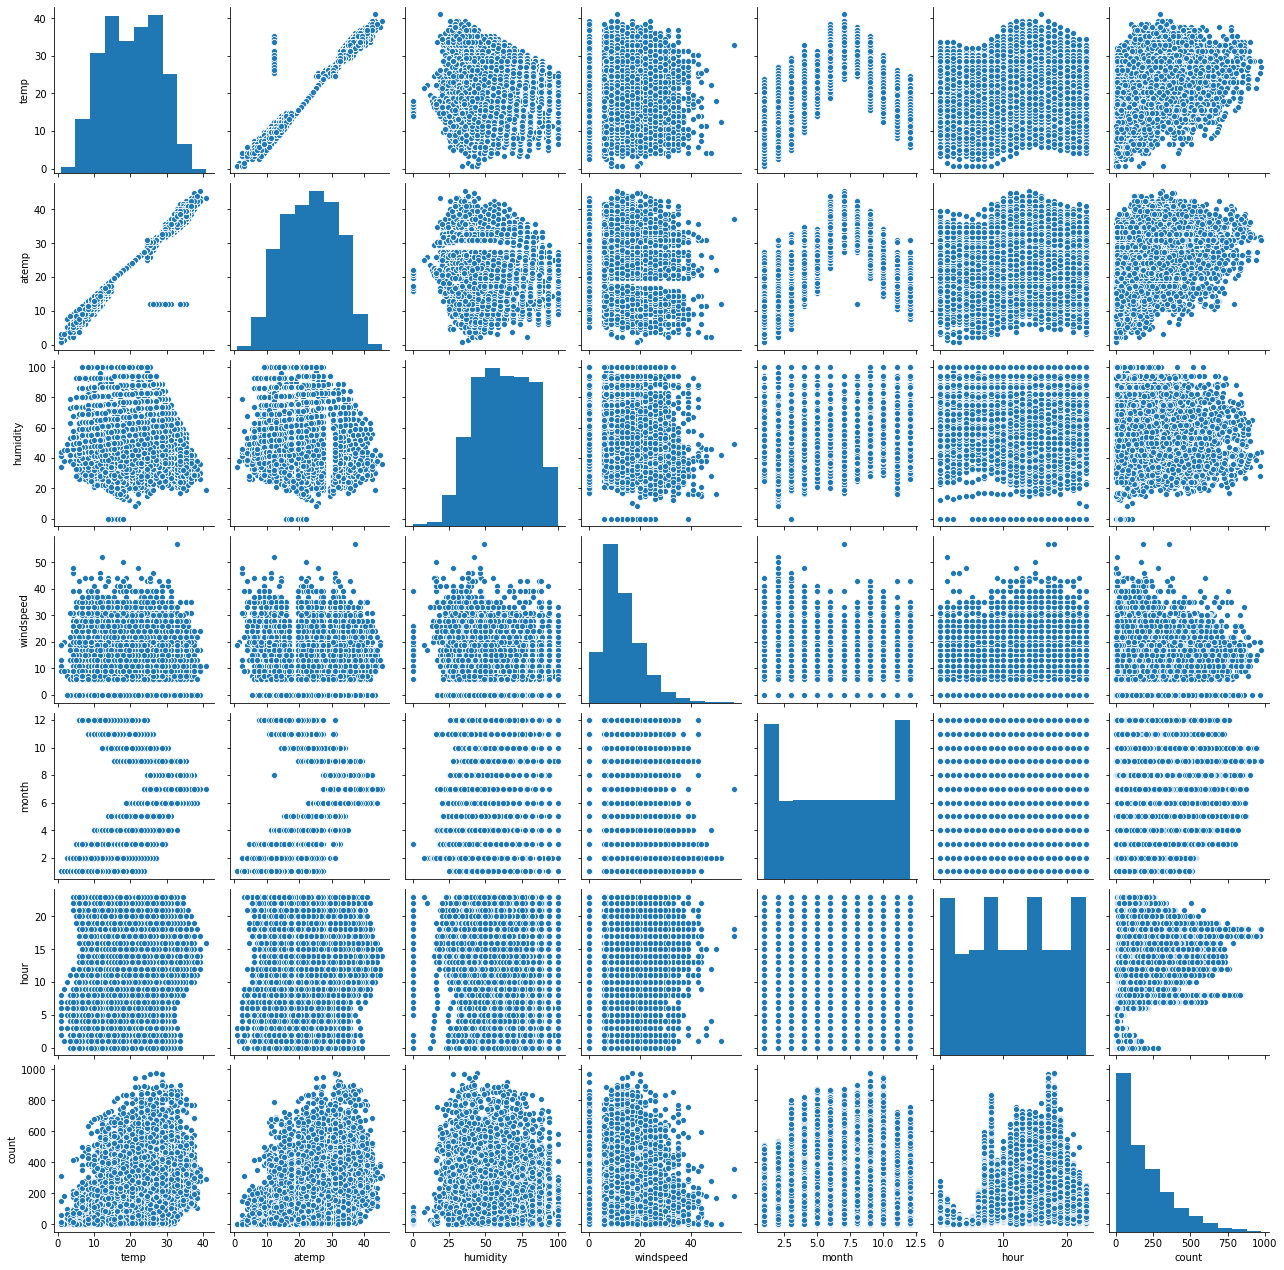

In [14]:
#pairplot to check for any correlation between the variables
sns.pairplot(dataset, vars=['temp','atemp','humidity','windspeed',"month","hour","count"])
plt.show()

In [ ]:
#from the pairwise graph we can deduce:
#1.temp and atemp are highly correlated (they have a linear relationship)

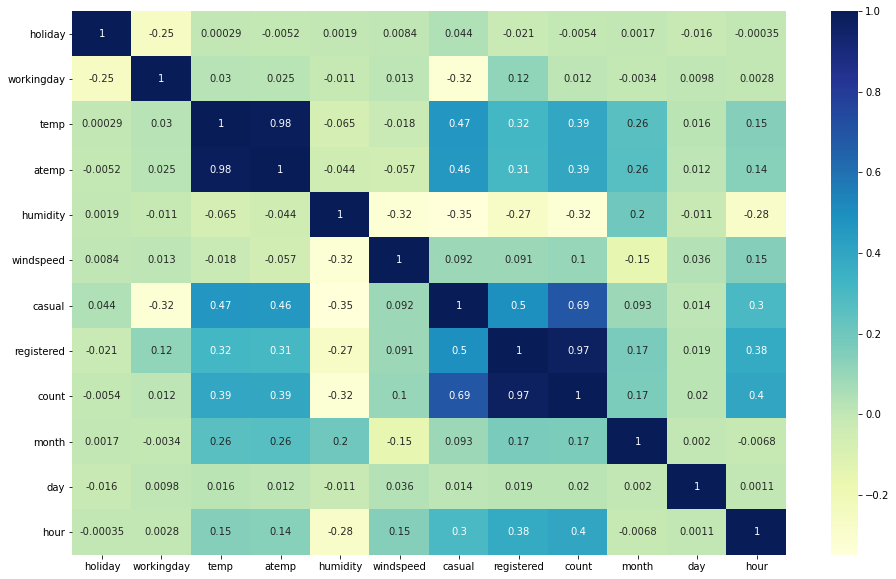

In [15]:
#draw the heat map to check for correlation values
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [16]:
#deductions from the heat map:
#the correlation between temp and atemp is 0.98, which is almost 1 (very high)

#so, we need the drop the temp column

dataset.drop(['temp'],axis=1,inplace=True)
dataset.head(10)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,Clear,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,Clear,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,Clear,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,Clear,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,Clear,14.395,75,0.0000,0,1,1,1,1,4
5,2011-01-01 05:00:00,spring,0,0,Misty+cloudy,12.880,75,6.0032,0,1,1,1,1,5
6,2011-01-01 06:00:00,spring,0,0,Clear,13.635,80,0.0000,2,0,2,1,1,6
7,2011-01-01 07:00:00,spring,0,0,Clear,12.880,86,0.0000,1,2,3,1,1,7
8,2011-01-01 08:00:00,spring,0,0,Clear,14.395,75,0.0000,1,7,8,1,1,8
9,2011-01-01 09:00:00,spring,0,0,Clear,17.425,76,0.0000,8,6,14,1,1,9


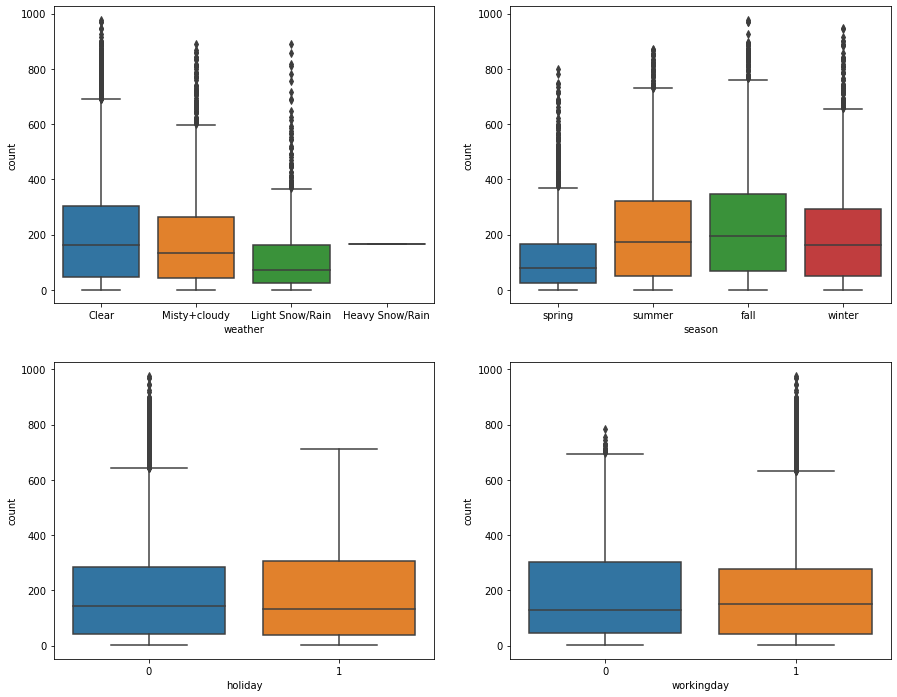

In [17]:
#outliers observations of categorical variables
f, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=dataset, y='count', x='weather', ax=axes[0][0])
sns.boxplot(data=dataset, y='count', x='season', ax=axes[0][1])
sns.boxplot(data=dataset, y='count', x='holiday', ax=axes[1][0])
sns.boxplot(data=dataset, y='count', x='workingday', ax=axes[1][1])


In [18]:
#removing the outliers
z_scores = stats.zscore(dataset[['holiday','workingday','atemp','humidity','windspeed','month','day','hour','count']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dataset = dataset[filtered_entries]

In [19]:
dataset.describe()
#size was: 10886
#after removing outliers: 10342

,holiday,workingday,atemp,humidity,windspeed,casual,registered,count,month,day,hour
count,10342.0,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000
mean,0.0,0.696770,23.580671,62.263682,12.582777,34.919938,148.455715,183.375653,6.526784,9.987720,11.462483
std,0.0,0.459676,8.419908,19.035799,7.843775,49.200220,136.884586,166.844823,3.445433,5.489213,6.939033
min,0.0,0.000000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.0,0.000000,16.665000,47.000000,7.001500,4.000000,35.000000,41.000000,4.000000,5.000000,5.000000
50%,0.0,1.000000,24.240000,62.000000,11.001400,16.000000,116.000000,142.000000,6.000000,10.000000,11.000000
75%,0.0,1.000000,31.060000,78.000000,16.997900,47.000000,218.000000,276.000000,10.000000,15.000000,17.000000
max,0.0,1.000000,45.455000,100.000000,36.997400,367.000000,712.000000,734.000000,12.000000,19.000000,23.000000


In [20]:
dataset.head(5)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,Clear,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,Clear,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,Clear,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,Clear,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,Clear,14.395,75,0.0,0,1,1,1,1,4


In [21]:
seasons_dummies = pd.get_dummies(dataset.season)
dataset_v2 = pd.concat([dataset, seasons_dummies], axis='columns')

weather_dummies = pd.get_dummies(dataset.weather)
dataset_v2 = pd.concat([dataset_v2, weather_dummies], axis='columns')

dataset_v2.sample(10)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,...,day,hour,fall,spring,summer,winter,Clear,Heavy Snow/Rain,Light Snow/Rain,Misty+cloudy
1755,2011-04-19 01:00:00,summer,0,1,Clear,22.725,63,15.0013,5,2,...,19,1,0,0,1,0,1,0,0,0
8633,2012-08-02 02:00:00,fall,0,1,Clear,30.305,83,6.0032,3,8,...,2,2,1,0,0,0,1,0,0,0
2399,2011-06-07 21:00:00,summer,0,1,Clear,34.090,70,8.9981,31,187,...,7,21,0,0,1,0,1,0,0,0
9957,2012-10-19 06:00:00,winter,0,1,Light Snow/Rain,25.760,94,11.0014,5,126,...,19,6,0,0,0,1,0,0,1,0
5182,2011-12-10 00:00:00,winter,0,0,Misty+cloudy,13.635,81,7.0015,11,66,...,10,0,0,0,0,1,0,0,0,1
2072,2011-05-13 06:00:00,summer,0,1,Light Snow/Rain,24.240,88,8.9981,6,76,...,13,6,0,0,1,0,0,0,1,0
1057,2011-03-08 14:00:00,spring,0,1,Misty+cloudy,19.695,20,0.0000,16,56,...,8,14,0,1,0,0,0,0,0,1
2624,2011-06-17 06:00:00,summer,0,1,Clear,26.515,94,0.0000,8,89,...,17,6,0,0,1,0,1,0,0,0
3504,2011-08-15 22:00:00,fall,0,1,Clear,31.060,69,16.9979,22,76,...,15,22,1,0,0,0,1,0,0,0
2133,2011-05-15 19:00:00,summer,0,0,Clear,26.515,83,7.0015,78,153,...,15,19,0,0,1,0,1,0,0,0


In [22]:
#drop unnecessary columns
dataset_v2.drop(['datetime','season','weather','casual','registered'],axis=1,inplace=True)

In [23]:
dataset_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          10342 non-null  int64  
 1   workingday       10342 non-null  int64  
 2   atemp            10342 non-null  float64
 3   humidity         10342 non-null  int64  
 4   windspeed        10342 non-null  float64
 5   count            10342 non-null  int64  
 6   month            10342 non-null  int64  
 7   day              10342 non-null  int64  
 8   hour             10342 non-null  int64  
 9   fall             10342 non-null  uint8  
 10  spring           10342 non-null  uint8  
 11  summer           10342 non-null  uint8  
 12  winter           10342 non-null  uint8  
 13  Clear            10342 non-null  uint8  
 14  Heavy Snow/Rain  10342 non-null  uint8  
 15  Light Snow/Rain  10342 non-null  uint8  
 16  Misty+cloudy     10342 non-null  uint8  
dtypes: float64(2

In [24]:
#rearrange the columns in the dataset
dataset_v2 = dataset_v2[['month','day','hour','holiday','workingday','atemp','humidity','windspeed','spring','summer','fall','winter','Clear','Misty+cloudy','Light Snow/Rain','Heavy Snow/Rain','count']]

In [25]:
dataset_v2.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
0,1,1,0,0,0,14.395,81,0.0,1,0,0,0,1,0,0,0,16
1,1,1,1,0,0,13.635,80,0.0,1,0,0,0,1,0,0,0,40


Part 2 (fitting different models)

In [26]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(dataset_v2, train_size = 0.8, test_size = 0.2, random_state = 1)

In [27]:
print(dataset_train.shape)
dataset_train.head(2)

(8273, 17)


,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
1562,4,10,23,0,0,22.725,88,23.9994,0,1,0,0,1,0,0,0,32
9477,9,18,6,0,1,28.790,89,22.0028,0,0,1,0,0,1,0,0,167


In [29]:
#to be used for final evaluation of the model
print(dataset_test.shape)
dataset_test.head(2)

(2069, 17)


,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
6609,3,12,16,0,1,31.06,35,30.0026,1,0,0,0,1,0,0,0,332
5607,1,8,18,0,0,15.91,46,15.0013,1,0,0,0,1,0,0,0,181


Normalizing the dataset of the train and test separately

In [30]:
#Performing the normalization step, as it's exteremly importantd for the model to perform well
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataset_train[['atemp','humidity','windspeed','count']] = scaler.fit_transform(dataset_train[['atemp','humidity','windspeed','count']])
dataset_train.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
1562,4,10,23,0,0,0.508685,0.869565,0.648678,0,1,0,0,1,0,0,0,0.042292
9477,9,18,6,0,1,0.649143,0.880435,0.594712,0,0,1,0,0,1,0,0,0.226467


In [31]:
dataset_test[['atemp','humidity','windspeed','count']] = scaler.fit_transform(dataset_test[['atemp','humidity','windspeed','count']])
dataset_test.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
6609,3,12,16,0,1,0.677928,0.261364,0.810938,1,0,0,0,1,0,0,0,0.453425
5607,1,8,18,0,0,0.338964,0.386364,0.405469,1,0,0,0,1,0,0,0,0.246575


In [33]:
#splitting the train data into train and validation data
dataset_train_v2, dataset_validation = train_test_split(dataset_train, train_size = 0.8, test_size = 0.2, random_state = 1)

In [34]:
#preparing the features and the target
X_train = dataset_train_v2.drop(['count'],axis=1)
y_train = dataset_train_v2['count']

X_train.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain
7760,6,3,17,0,0,0.719314,0.282609,0.459435,0,1,0,0,1,0,0,0
9808,10,13,1,0,0,0.368342,0.489130,0.243209,0,0,0,1,1,0,0,0


In [36]:
X_validate = dataset_validation.drop(['count'],axis=1)
y_validate = dataset_validation['count']

X_validate.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain
8846,8,10,23,0,1,0.771885,0.673913,0.513582,0,0,1,0,1,0,0,0
428,1,19,21,0,1,0.315771,0.445652,0.756791,1,0,0,0,1,0,0,0


Linear Regression

In [37]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()  # create object for the class
LR.fit(X_train, y_train)  # perform linear regression

y_train_pred_LR = LR.predict(X_train) 
y_validate_pred_LR = LR.predict(X_validate)


In [40]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred_LR)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_LR))

Root Mean squared error: 0.19
R sqaured value is: 0.340961


In [41]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_validate, y_validate_pred_LR)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_validate_pred_LR))

Root Mean squared error: 0.18
R sqaured value is: 0.352218


In [ ]:
#Regularization helps to solve over fitting problem in machine learning. 
# Simple model will be a very poor generalization of data. 
# At the same time, complex model may not perform well in test data due to over fitting. 
# We need to choose the right model in between simple and complex model. 
# Regularization helps to choose preferred model complexity, so that model is better at predicting. 
# Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. 
# It can be used for many machine learning algorithms

In [ ]:
###Regularization of linear models:
#Regularization is a method for “constraining” or “regularizing” the size of the coefficients, thus “shrinking” them towards zero.
#It reduces model variance and thus minimizes overfitting.
#If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

In [42]:
#applying regularization to the linear regression model
#hyperparameter tuning: alpha
from sklearn.linear_model import Ridge
Ridge_LR = Ridge(alpha=10)
Ridge_LR.fit(X_train, y_train)
y_pred = Ridge_LR.predict(X_validate)
# calculate R^2 value, MAE, MSE, RMSE
from sklearn import metrics
print("R-Square Value",r2_score(y_validate,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_validate, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_validate, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_validate, y_pred)))

R-Square Value 0.35267994465986496


mean_absolute_error : 0.13507013305986618


mean_squared_error :  0.03216844753181535


root_mean_squared_error :  0.1793556453859631


In [43]:
#hyperparameter tuning: alpha
from sklearn.linear_model import Lasso
lasso_LR = Lasso(alpha=0.0007)
lasso_LR.fit(X_train, y_train)
y_pred = lasso_LR.predict(X_validate)
# calculate R^2 value, MAE, MSE, RMSE
from sklearn import metrics
print("R-Square Value",r2_score(y_validate,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_validate, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_validate, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_validate, y_pred)))


R-Square Value 0.35122611966141026


mean_absolute_error : 0.13525869363727464


mean_squared_error :  0.03224069508972341


root_mean_squared_error :  0.17955694107921144


Decision Trees

In [44]:
#decision tree
#hyperparameter tuning: max_depth, min_samples_split
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=None,splitter='best',max_features=None,random_state=0, ccp_alpha=0.00001)
DT.fit(X_train, y_train)
y_train_pred_DT = DT.predict(X_train) 
y_test_pred_DT = DT.predict(X_validate)


In [ ]:
#hyperparameter:
#splitter: The strategy used to choose the split at each node. Supported are “best” to choose the best split and “random” to choose the best random split.
#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#random_state: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
#cc_alpha: The complexity parameter, alpha. Increasing this value leads to more complex trees. 0 (default) means no complexity penalty.


In [45]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred_DT)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_DT))

Root Mean squared error: 0.07
R sqaured value is: 0.905653


In [46]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_DT)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_DT))

Root Mean squared error: 0.10
R sqaured value is: 0.786792


Ensemble learning

In [47]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0,ccp_alpha=0.00001)
RF.fit(X_train, y_train)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_validate)

In [ ]:
#hyperparameter tuning: 
#n_estimators: The number of trees in the forest.
#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#random_state: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
#cc_alpha: The complexity parameter, alpha. Increasing this value leads to more complex trees. 0 (default) means no complexity penalty.

In [48]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_RF))

Root Mean squared error: 0.08
R sqaured value is: 0.883490


In [49]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_RF))

Root Mean squared error: 0.09
R sqaured value is: 0.842055
